In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data prep

In [108]:
data = pd.read_csv('wdbc.data', names=['ID', 'Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean','Area_mean','Smooth_mean',
'Compactness_mean','Concavity_mean','Concave_points_mean','Symmetry_men','FD_mean', 'Radius_se', 'Texture_se','Perimeter_se','Area_se',
'Smooth_se','Compactness_se','Concavity_se','Concave_points_se','Symmetry_se','FD_se','Radius_w','Texture_w','Perimeter_w','Area_w',
'Smooth_w','Compactness_w','Concavity_w','Concave_points_w','Symmetry_w','FD_w'])

y = data.iloc[:,1].values
X = data.iloc[:, 2:32].values
data = pd.DataFrame(data)
data.head()

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smooth_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_w,Texture_w,Perimeter_w,Area_w,Smooth_w,Compactness_w,Concavity_w,Concave_points_w,Symmetry_w,FD_w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [109]:
# No missing values
data.isnull()

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smooth_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_w,Texture_w,Perimeter_w,Area_w,Smooth_w,Compactness_w,Concavity_w,Concave_points_w,Symmetry_w,FD_w
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


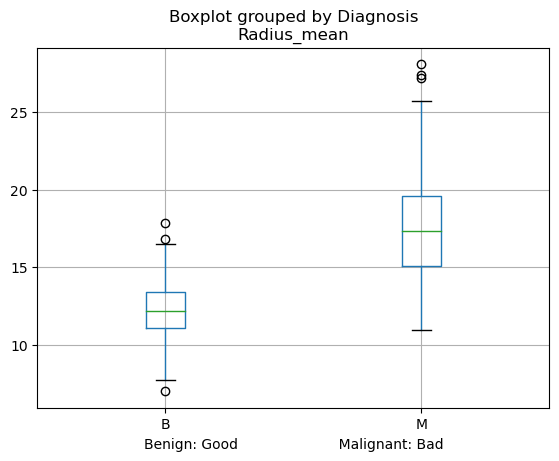

In [110]:
data.boxplot(column='Radius_mean', by='Diagnosis')
plt.xlabel('Benign: Good                       Malignant: Bad')
plt.show()

# Baseline

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
voteM = 0
voteB = 0
for i in y_train:
    if i == 'M':
        voteM += 1
    else:
        voteB += 1
if voteB > voteM:
    print('Majority voting on B: Benign')
else:
    print('Majority voting on M: Malignant')

# Initiate outer fold
cv_outer = KFold(5,shuffle=True)
scores = []
# Enumerate the 5 folds
outer_res = []
for train_ix, test_ix in cv_outer.split(X):
   # Split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

    # Standardize
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Start the cv
    cv_inner = KFold(n_splits=3, shuffle=True)
    # Define the model
    voteM = 0
    voteB = 0
    for i in y_train:
        if i == 'M':
            voteM += 1
        else:
            voteB += 1
    if voteB > voteM:
        print('Majority voting on B: Benign')
    else:
        print('Majority voting on M: Malignant')
    scores.append(np.max([voteB,voteM])/(voteB+voteM))

# Summarize best results
print(('Accuracy: %.3f (std: %.3f)') % (np.mean(scores), np.std(scores)))
base_scores = scores
print(f'Baseline accuracy scores: {base_scores}')

Majority voting on B: Benign
Majority voting on B: Benign
Majority voting on B: Benign
Majority voting on B: Benign
Majority voting on B: Benign
Majority voting on B: Benign
Accuracy: 0.631 (std: 0.016)
Baseline accuracy scores: [0.6384976525821596, 0.6056338028169014, 0.6455399061032864, 0.647887323943662, 0.6197183098591549]


# Model 1: Decision Tree

In [111]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [160]:
# Initiate outer fold
cv_outer = KFold(5,shuffle=True)

# Enumerate the 5 folds
outer_res = []
for train_ix, test_ix in cv_outer.split(X):
   # Split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Standardize
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Start the cv
    cv_inner = KFold(n_splits=3, shuffle=True)
    # Define the model
    model = RandomForestClassifier()

    # Create search space
    space = dict()
    space['n_estimators'] = [10,100,500] # 3 folds in inner loop
    space['max_features'] = [2,4,6] # 3 folds in inner loop
    # Defining search
    search = GridSearchCV(model, space, scoring = 'accuracy', cv = cv_inner, refit = True)
    result = search.fit(X_train,y_train)

    # Cross val score select the best model and best parameters for each outer loop
    scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)

# Summarize best results
print(('Accuracy: %.3f (%.3f)') % (np.mean(scores), np.std(scores)))
tree_scores = scores
print(f'Decision Tree accuracy scores: {tree_scores}')

Accuracy: 0.960 (0.024)
Decision Tree accuracy scores: [0.96491228 0.97368421 0.97368421 0.9122807  0.97345133]


# Model 2: Logistic Regression

In [161]:
# Initiate outer fold
cv_outer = KFold(5,shuffle=True)
scores = []
# Enumerate the 5 folds
outer_res = []
for train_ix, test_ix in cv_outer.split(X):
   # Split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Standardize
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Start the cv
    cv_inner = KFold(n_splits=3, shuffle=True)
    # Define the model
    model = LogisticRegression()

    result = model.fit(X_train,y_train)
    y_pred = result.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

# Summarize best results
print(('Accuracy: %.3f (std: %.3f)') % (np.mean(scores), np.std(scores)))
logreg_scores = scores
print(f'Log Reg accuracy scores: {logreg_scores}')

Accuracy: 0.969 (std: 0.011)
Log Reg accuracy scores: [0.965034965034965, 0.951048951048951, 0.972027972027972, 0.986013986013986, 0.972027972027972]
